#### **환경) 구글 드라이브와 콜랩 연동**

In [4]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# 연동 후 자신의 google drive에 있는 data 디렉토리 확인
!cd "/content/drive/My Drive/data/MLpractice"; ls -l

total 115
-rw------- 1 root root 23105 Oct 29 08:22 diabetes.csv
-rw------- 1 root root  3258 Sep 18 14:49 titanic_gender_submission.csv
-rw------- 1 root root 28629 Sep 18 14:49 titanic_test.csv
-rw------- 1 root root 61194 Sep 18 14:49 titanic_train.csv


#### **판다스** : 2차원 데이터를 효율적으로 가공/처리할 수 있는 기능 제공하는 라이브러리  based on ndarray

* Series : 1개의 Column'값'만으로 구성된 1차원 데이터 셋, 컬럼명은 존재하지 않는다
* DataFrame : Columns X Rows로 구성된 2차원 데이터셋 
* 인덱스 : DataFrame/Series의 고유한 'key값 객체' -> 하지만 RDBMS와는 다르게 컬럼명이 없으며 순수하게 유일한 값만을 나타냄. pk라고 생각하면 편함, 물리값을 가짐

In [13]:
# Pandas 시작- 파일을 DataFrame 로딩, 기본 API
import pandas as pd

# read_csv()
# read_csv() 의 sep 인자를 콤마(,)가 아닌 다른 분리자로 변경하여 다른 유형의 파일도 로드가 가능
titanic_df = pd.read_csv('/content/drive/My Drive/data/MLpractice/titanic_train.csv') # csv파일을 dataFrame으로 받음

In [12]:
print('titanic 변수 type:', type(titanic_df))

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


In [16]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
# head()
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
# DataFrame 생성 
dic1 = {'Name':['Chulmin','Eunkyung','Jinwoong','Soobeam'],
        'Year':[2011, 2016, 2015, 2015],
        'Gender':['Male','Female','Male','Male']
       }

# 딕셔너리를 DataFrame으로 변환 (딕셔너리의 key값-> 컬럼명, value값 -> 컬럼의 value)
data_df= pd.DataFrame(dic1)
print(data_df)
print("#"*30)

# 새로운 컬럼명을 추가
data_df = pd.DataFrame(dic1, columns=['Name', 'Year', 'Gender', 'Age'])
print(data_df)
print("#"*30)

# 인덱스를 새로운 값으로 할당
data_df = pd.DataFrame(dic1, index=['one','two','third','four'])
print(data_df)
print('#'*30)

       Name  Year  Gender
0   Chulmin  2011    Male
1  Eunkyung  2016  Female
2  Jinwoong  2015    Male
3   Soobeam  2015    Male
##############################
       Name  Year  Gender  Age
0   Chulmin  2011    Male  NaN
1  Eunkyung  2016  Female  NaN
2  Jinwoong  2015    Male  NaN
3   Soobeam  2015    Male  NaN
##############################
           Name  Year  Gender
one     Chulmin  2011    Male
two    Eunkyung  2016  Female
third  Jinwoong  2015    Male
four    Soobeam  2015    Male
##############################


In [18]:
data_df.index # object index

Index(['one', 'two', 'third', 'four'], dtype='object')

#### DataFrame의 컬럼명과 인덱스

In [19]:
# 컬럼명 확인 : df.columns
# 인덱스 구조 확인 : df.index
# 인덱스 전체 확인 : df.index.values

print('columns:', titanic_df.columns)
print('index:', titanic_df.index) # RangeIndex : 순차적으로 값이 증가하는 인덱스
print('index value:',titanic_df.index.values)

columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
index: RangeIndex(start=0, stop=891, step=1)
index value: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 1

#### DataFrame에서 Series 추출 및 DataFrame 필터링 추출

In [20]:
# DataFrame객체에서 []연산자 내에 한개의 컬럼만 입력하면 Series 객체를 반환
series = titanic_df['Name']
print(series.head(3))
print('## type:', type(series))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
Name: Name, dtype: object
## type: <class 'pandas.core.series.Series'>


In [21]:
# DataFrame객체에서 []연산자 내에 여러개의 컬럼을 리스트로 입력하면 그 컬럼들로 구성된 DataFrame 반환
filtered_df = titanic_df[['Name','Age']]
print(filtered_df.head(3))
print('## type:', type(filtered_df))

                                                Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
## type: <class 'pandas.core.frame.DataFrame'>


In [22]:
# DataFrame객체에서 []연산자 내에 한개의 컬럼을  리스트로 입력하면 한개의 컬럼으로 구성된 DataFrame 반환
one_col_df = titanic_df[['Name']]
print(one_col_df.head(3))
print('## type:', type(one_col_df))

                                                Name
0                            Braund, Mr. Owen Harris
1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2                             Heikkinen, Miss. Laina
## type: <class 'pandas.core.frame.DataFrame'>


**shape**  
DataFrame의 행과 열 크기를 가지고 있는 속성

In [23]:
print('DataFrame의 크기:', titanic_df.shape) # 인덱스는 속성=컬럼에 포함되지 않는다

DataFrame의 크기: (891, 12)


**info()**  
DataFrame내의 컬럼명, 데이터 타입, Null건수, 데이터 건수 정보 등 메타데이터 제공

In [24]:
titanic_df.info()
# object - 대충 string으로이해하면 된다.
# 판다스 dataFrame은 메모리를 사용하기 때문에 대용량 데이터 사용할 때 주의

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**describe()**  
데이터값들의 평균, 표준편차, 4분위 분포도 제공. 숫자형 컬럼들에 대해서 해당 정보제공 

In [25]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
import numpy as np
titanic_df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**value_counts()**    
동일한 개별 데이터 값이 몇건이 있는지 정보를 제공 -> 개별 데이터 값의 분포도 제공  
단, Series 객체에서만 호출될 수 있으므로, 반드시 DataFrame을 단일 컬럼으로 입력하여 Series로 변환한 뒤 호출

In [27]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
# 이 경우, 각각의 pClass값이 유일한 값이기 때문에 인덱스처럼 사용된다.

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [28]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

<class 'pandas.core.series.Series'>


In [29]:
titanic_pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [30]:
value_counts = titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
3    491
1    216
2    184
Name: Pclass, dtype: int64


**sort_values()** by = 정렬컬럼, ascending=True 오름차순 또는 False 내림차순으로 정렬

In [31]:
titanic_df.sort_values(by='Pclass', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S


In [32]:
titanic_df[['Name','Age']].sort_values(by='Age')

,Name,Age
803,"Thomas, Master. Assad Alexander",0.42
755,"Hamalainen, Master. Viljo",0.67
644,"Baclini, Miss. Eugenie",0.75
469,"Baclini, Miss. Helene Barbara",0.75
78,"Caldwell, Master. Alden Gates",0.83
...,...,...
859,"Razi, Mr. Raihed",NaN
863,"Sage, Miss. Dorothy Edith ""Dolly""",NaN
868,"van Melkebeke, Mr. Philemon",NaN
878,"Laleff, Mr. Kristo",NaN


In [33]:
titanic_df[['Name','Age','Pclass']].sort_values(by=['Pclass','Age'])

,Name,Age,Pclass
305,"Allison, Master. Hudson Trevor",0.92,1
297,"Allison, Miss. Helen Loraine",2.00,1
445,"Dodge, Master. Washington",4.00,1
802,"Carter, Master. William Thornton II",11.00,1
435,"Carter, Miss. Lucile Polk",14.00,1
...,...,...,...
859,"Razi, Mr. Raihed",NaN,3
863,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,3
868,"van Melkebeke, Mr. Philemon",NaN,3
878,"Laleff, Mr. Kristo",NaN,3


### DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호변환
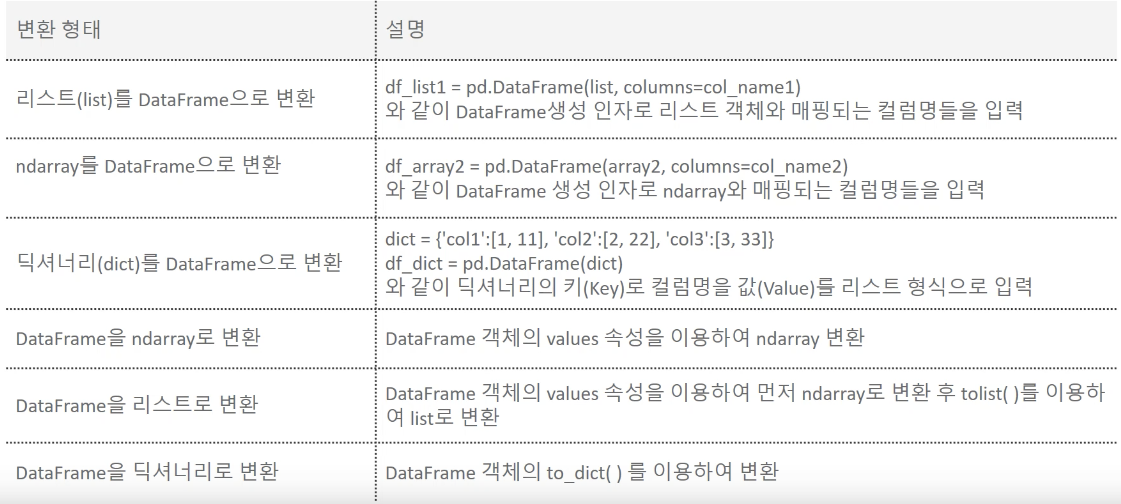![image.png]
(attachment:image.png)

**list, ndarray -> DataFrame**

pd.DataFrame(list, columns = 컬럼명)  
pd.DataFrame(ndarray, columns = 컬럼명)

In [ ]:
import numpy as np

col_name1=['col1']
list1 = [1, 2, 3]
array1 = np.array(list1)

print('array1 shape:', array1.shape)

# 1차원 리스트로 만든 DataFrame
df_list1 = pd.DataFrame(list1, columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)

# 1차원 ndarray로 만든 DataFrame
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


In [34]:
# 3개의 컬럼명이 필요함
col_name2 = ['col1', 'col2', 'col3']

# 2행x3열 형태의 리스트와 ndarray 생성 한 뒤 이를 DataFrame으로 변환. 
list2 = [[1, 2, 3],
         [11, 12, 13]]
array2 = np.array(list2)
print('array2 shape:', array2.shape )

# 2차원 리스트로 만든 DataFrame
df_list2 = pd.DataFrame(list2, columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)

# 2차원 ndarray로 만든 DataFrame
df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape: (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


**dictionary -> DataFrame**  
pd.DataFrame(dict)

In [35]:
# key는 컬럼명으로 매핑, value는 리스트형(또는 ndarray)
dict = {'col1':[1,11], 'col2':[2,22], 'col3':[3,33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


**DataFrame -> ndarray** : 머신러닝 함수에 넣기 위해서 반드시 ndarray로 변환해야하는 경우에 많이 사용  
ndarray) df.values

In [36]:
# DataFrame을 ndarray로 변환 : df.values
array3 = df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values 차원형태:',array3.shape)
print(array3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values 차원형태: (2, 3)
[[ 1  2  3]
 [11 22 33]]


**DataFrame -> list, dictionary**  
list) df.values.tolist()  
dict) df.to_dict()

In [37]:
# DataFrame을 list로 변환 : df.values.tolist()
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입:', type(list3))
print(list3)

# DataFrame을 dictionary로 변환 : df.to_dict() 
dict3 = df_dict.to_dict()
print('df_dict.to_dict() 타입:', type(dict3))
print(dict3)

df_dict.values.tolist() 타입: <class 'list'>
[[1, 2, 3], [11, 22, 33]]
df_dict.to_dict() 타입: <class 'dict'>
{'col1': {0: 1, 1: 11}, 'col2': {0: 2, 1: 22}, 'col3': {0: 3, 1: 33}}


### DataFrame 컬럼 데이터 셋 Access
DataFrame의 컬럼 데이터 세트 생성과 수정은 []연산자를 이용  
새로운 컬럼에 값을 할당하려면 DataFrame[] 내에 새로운 컬럼명을 입력하고 값을 할당

In [38]:
titanic_df['Age_0'] = 0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [39]:
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch']+1
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,350.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,350.0,1


**기존 컬럼에 값을 업데이트 : 해당 컬럼에 업데이트 값을 그대로 지정**

In [40]:
titanic_df['Age_by_10'] = titanic_df['Age_by_10']+100
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,450.0,1


### DataFrame의 drop()
DataFrame.drop(labels=None, *axis=0*, index=None, columns = None, level=None, *inplace=False*, errors='raise')

* axis : DataFrame의 Row를 삭제할 때는 axis=0, Column을 삭제할 때는 axis=1으로 설정. (axis=0이 디폴트!) 
* inplace = False : 원본 DataFrame은 유지, 드롭된 DataFrame을 새롭게 객체 변수로 받고싶은 경우 (디폴트가 False)
* inplace = True : 원본 DataFrame에 드롭된 결과를 적용할 경우  
  **titanic_drop_df('Age_0', axis=1, inplace=True)**
* 원본 DataFrame에서 드롭된 DataFrame을 다시 원본 DataFrame 객체 변수로 할당하면 원본 DataFrame에서 드롬된 결과를 적용할 경우와 동일  
(단, 기존 원본 DataFrame 객체 변수는 메모리에서 추후 제거됨)  
  **titanic_df = titanic_df.drop('Age_0', axis=1,inplace =False)**

In [41]:
# axis에 따른 dataFrame 데이터 삭제
titanic_drop_df = titanic_df.drop('Age_0', axis=1) # inplace = False -> 원본 df에는 영향X, drop된 값이 반환만 된다.
titanic_drop_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,450.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,450.0,1


In [42]:
titanic_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,450.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,450.0,1


In [43]:
# 여러개의 컬럼의 삭제 : drop()의 인자로 삭제 컬럼들을 리스트로 입력 
drop_result = titanic_df.drop(['Age_0','Age_by_10','Family_No'],axis=1, inplace = True) # inplace = True 로 삭제한값을 변수로 받는건 옳지 않은 사용법이지만 이해를 돕기 위해
# inplace = True -> 호출한 df에 drop반영, 반환값 None

print('inplace = True 로 drop 후 반환된 값 :', drop_result)  
titanic_df.head()

inplace = True 로 drop 후 반환된 값 : None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* axis=0 인 경우 drop()은 row방향으로 데이터 삭제

In [ ]:
titanic_df = pd.read_csv('titanic_train.csv')

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)

print('#### before axis 0 drop ####')
print(titanic_df.head(3))

# 위에서부터 3행 삭제 : df.drop([0:2])
titanic_df.drop([0,1,2], axis=0, inplace=True)
print('#### after axis 0 drop ####')
print(titanic_df.head(3)) 

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


In [ ]:
print(titanic_df.drop)

<bound method DataFrame.drop of      PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked
3              4         1       1  Futrelle, M...  female  35.0      1      0      113803  53.1000  C123        S
4              5         0       3  Allen, Mr. ...    male  35.0      0      0      373450   8.0500   NaN        S
5              6         0       3  Moran, Mr. ...    male   NaN      0      0      330877   8.4583   NaN        Q
6              7         0       1  McCarthy, M...    male  54.0      0      0       17463  51.8625   E46        S
7              8         0       3  Palsson, Ma...    male   2.0      3      1      349909  21.0750   NaN        S
..           ...       ...     ...             ...     ...   ...    ...    ...         ...      ...   ...      ...
886          887         0       2  Montvila, R...    male  27.0      0      0      211536  13.0000   NaN        S
887          888         1       1  Graham, Mis.

### Index
* 판다스의 Index 객체는 RDBMS의 PK와 유사하게 DataFrame, Series의 레코드를 고유하게 식별하는 객체
* DataFrame,Series에서 Index 객체만 추출하려면 DataFrame.Index 또는 Series.Index 속성을 통해 가능
* Series 객체는 Index 객체를 포함하지만 Series 객체에 연산 함수를 적용할 때 Index는 연산에서 제외된다. 오직 식별용!
* DataFrame 및 Series에 reset_index() 메서드를 수행하면 새롭게 인덱스를 연속숫자형으로 할당하며 기존 인덱스는 'index'라는 새로운 컬럼명으로 추가된다.

In [ ]:
# RangeIndex : 유니크만 보장된다면 0부터 시작하지 않아도 된다. 
# DatetimeIndex 등 다양한 인덱스가 존재

In [45]:
# 원본 파일 재로딩 
titanic_df = pd.read_csv('/content/drive/My Drive/data/MLpractice/titanic_train.csv')

# Index 객체 추출
indices = titanic_df.index
print(indices)

# Index 객체를 실제 값 array로 변환
print('Index 객체 array값:\n', indices.values)

RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

Index는 1차원 데이터

In [46]:
print(type(indices.values))
print(indices.values.shape)
print(indices[:5].values)
print(indices.values[:5])
print(indices[6])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


In [ ]:
print(indices[0])

0


* []를 이용하여임의로 Index의 값을 변경할수 없다.

In [ ]:
indices[0] = 5

TypeError: Index does not support mutable operations

Series객체는 Index 객체를 포함하지만 Series객체에 연산함수 적용할때 Index는 연산에서 제외. 오직 식별용

In [47]:
series_fair = titanic_df['Fare']
series_fair.head(5)

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [48]:
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series:', sum(series_fair))
print('Fair Series + 3:\n',(series_fair + 3).head(3) )

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series: 28693.949299999967
Fair Series + 3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


* reset_index()  
DataFrame 및 Series에 reset_index() 메서드를 수행하면 
새롭게 인덱스를 연속 숫자형으로 할당하며 기존 인덱스는 'index'라는 새로운 컬럼명으로 추가

In [49]:
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [50]:
titanic_df.shape

(891, 12)

In [51]:
titanic_reset_df.shape

(891, 13)

In [52]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))

new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

### before reset_index ###
3    491
1    216
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   index  Pclass
0      3     491
1      1     216
2      2     184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


### 데이터 Selection 및 Filtering

- [] : break-it  
    컬럼 기반 필터링 또는 불린 인덱스 필터링 제공 
  
- ix[], loc[], iloc[]  
    명칭/위치 기반 인덱싱 제공
  
- 불린 인덱싱  
    조건식에 따른 필터링 제공   
    위치기반, 명칭기반 인덱싱 모두 사용할 필요없이 조건식을 []안에 기입해서 필터링 수행
    

#### 1. DataFrame의 []연산자
넘파이에서 []연산자는 행의 위치, 열의 위치, 슬라이싱 범위 등을 지정해 데이터를 가져올 수 있었다.  
하지만 DataFrame 바로 뒤에 있는 [] 안에 들어갈 수 있는건 
- 컬럼명 문자(또는 컬럼명의 리스트 객체)
- 인덱스로 변환가능한 표현식(ex. 슬라이싱, 불린인덱싱)뿐! 

In [53]:
titanic_df = pd.read_csv('/content/drive/My Drive/data/MLpractice/titanic_train.csv')
print('단일 컬럼 데이터 추출:\n', titanic_df[ 'Pclass' ].head(3))
print('\n여러 컬럼들의 데이터 추출:\n', titanic_df[ ['Survived', 'Pclass'] ].head(3))

단일 컬럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 컬럼들의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


In [ ]:
print('[ ] 안에 숫자 index는 KeyError 오류 발생:\n', titanic_df[0])

KeyError: 0

- DataFrame의 []내에 숫자값을 입력하면 오류 발생  
    BUT! Pandas의 Index형태로 변환가능한 표현식은 숫자형태라도 []내에 입력할 수 있다.  -> 가능은 하지만 헷갈리니 그다지 추천안함

In [54]:
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


[]내에 조건식을 입력하여 불링인덱싱을 수행할 수 있다.  
**DataFrame 바로 뒤에 있는 []안에 들어갈 수 있는 것은 [컬럼명]과 [불린인덱싱]으로 범위를 좁혀서 코딩하는게 도움이 된다**


위치기반, 명칭기반 인덱싱 모두 사용할 필요없이 조건식을 []안에 기입하여 간편하게 필터링을 수행하는걸 추천

In [55]:
titanic_df[titanic_df['Pclass']==3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


#### **위치(position) 기반 인덱싱** 
0을 출발점으로 하는 가로축, 세로축 좌표 기반의 행과 열 위치를 기반으로 데이터를 지정 = 행, 열 위치값으로 정수가 입력 

In [58]:
data_df.head()

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
third,Jinwoong,2015,Male
four,Soobeam,2015,Male


In [ ]:
#iloc[] : 위치 기반 인덱싱 -> 고정된 psycial한 위치를 기반으로!
# 위치는 변하지 않는다. 인덱스는 0부터 시작하지 않아도. 행 위치, 열 위치는 0부터 시작

In [59]:
data_df.iloc[0,0]

'Chulmin'

In [ ]:
# 아래의 코드는 오류를 발생
data_df.iloc[0, 'Name']
data_df.iloc['one', 0]

In [61]:
# data_df 를 reset_index() 로 새로운 숫자형 인덱스를 생성
data_df_reset = data_df.reset_index()
data_df_reset = data_df_reset.rename(columns={'index':'old_index'})

# index 값에 1을 더해서 1부터 시작하는 새로운 index값 생성
data_df_reset.index = data_df_reset.index+1
data_df_reset

,old_index,Name,Year,Gender
1,one,Chulmin,2011,Male
2,two,Eunkyung,2016,Female
3,third,Jinwoong,2015,Male
4,four,Soobeam,2015,Male


In [62]:
data_df_reset.iloc[0,1]

'Chulmin'

#### **명칭(Label) 기반 인덱싱**
컬럼명 같이 명칭으로 열 위치를 지정하는 방식


In [63]:
#loc[] : 명칭 기반 인덱싱 -> RangeIndex의 0을 찾아간다는건.. 명칭기반이다!

In [64]:
data_df.loc['one', 'Name']

'Chulmin'

In [65]:
data_df_reset.loc[1,'Name']

'Chulmin'

In [66]:
# 아래의 코드는 오류를 발생
data_df_reset.loc[0,'Name']

KeyError: ignored

#### **ix[]** : 명칭과 위치 기반 인덱싱 모두 제공 

In [56]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [57]:
#ix[] : 명칭 기반과 위치 기반 인덱싱 함께 제공 -> 명칭이랑 위치기반이랑 동일해야 적용됨 --> 판다스 업데이트로 삭제됨! 
print('컬럼 위치 기반 인덱싱 데이터 추출 :', titanic_df.ix[0,2])
print('컬럼명 기반 인ㄷ게싱 데이터 추철 :', titanic_df.ix[0,'Pclass'])

AttributeError: ignored

#### **Boolean Indexing [조건식]**

In [67]:
titanic_df = pd.read_csv('/content/drive/My Drive/data/MLpractice/titanic_train.csv')
titanic_boolean = titanic_df[titanic_df['Age'] > 60]
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [68]:
titanic_df['Age'] > 60

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [69]:
var1 = titanic_df['Age']>60
print(type(var1))

<class 'pandas.core.series.Series'>


In [70]:
# dataframe명[조건식][['반환할 컬럼명1', '반환할 컬럼명2', ... ]]
titanic_df[titanic_df['Age']>60][['Name', 'Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [71]:
# dataframe명[['반환할 컬럼명1', '반환할 컬럼명2', ... ]][조건식]
titanic_df[['Name', 'Age']][titanic_df['Age']>60].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [72]:
# dataframe명.loc[조건식, ['반환할 컬럼명1', '반환할 컬럼명2']] ; loc도 불린인덱싱 적용가능 
titanic_df.loc[titanic_df['Age']>60, ['Name', 'Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [75]:
# 논리연산자로 결합된 조건식도 불린 인덱싱 적용가능
titanic_df[(titanic_df['Age']>60)&(titanic_df['Pclass']==1)&(titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [76]:
# 조건식은 변수로도 할당가능 -> 가독성 업!
cond1 = titanic_df['Age']>60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='female'
titanic_df[cond1&cond2&cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


### Aggregation 함수 및 Group by
DataFrame의 경우 DataFrame에서 바로 aggregation을 호출할 경우 모든 컬럼에 해당 aggregation을 적용  
axis 방향에 따라 달라짐! (axis=0 : 행축방향, axis=1 : 열축 방향)


In [82]:
# NaN값은 count값에서 제외
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [83]:
# 특정 컬럼들로 aggregation 수행
titanic_df[['Age','Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [84]:
titanic_df[['Age','Fare']].sum()

Age     21205.1700
Fare    28693.9493
dtype: float64

In [85]:
titanic_df[['Age','Fare']].count()

Age     714
Fare    891
dtype: int64

**group by**인자에 Group by 하고자 하는 컬럼을 입력, 여러개의 컬럼으로 Group by하고자하면 []내에 해당 컬럼명을 입력.  
DataFrame에 groupby()를 호출하면 DataFrameGroupBy 객체를 반환 

In [86]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby)) # DataFrameGroupBy 객체 그 자체 -> 여기에 aggregation 함수를 써줘야 효과가 나온다
print(titanic_groupby)

pandas.core.groupby.generic.DataFrameGroupBy


In [88]:
# DataFrameGroupBy 객체에 Aggregation함수를 호출하여 Group by 수행
titanic_groupby = titanic_df.groupby('Pclass').count() # Pclass가 인덱스가 된다
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [89]:
print(type(titanic_groupby)) 
print(titanic_groupby.shape) # groupby 기준이 된 컬럼이 인덱스가 되었기 때문에, 컬럼개수가 줄었다. 
print(titanic_groupby.index) 

<class 'pandas.core.frame.DataFrame'>
(3, 11)
Int64Index([1, 2, 3], dtype='int64', name='Pclass')


In [90]:
#특정 컬럼들에 대해서 ㅇㅇ컬럼으로 Groupby한 결과 : df.groupby(by=그룹핑기준컬럼명)[['반환할컬럼명1', ...]].집계함수
titanic_groupby = titanic_df.groupby(by='Pclass')[['PassengerId', 'Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [91]:
# 먼저 반환할 컬럼을 특정짓고 groupby를 할 경우에는 반드시 groupby의 기준으로 넣어줄 컬럼명도 사전에 명명해줘야한다. 
titanic_df[['Pclass','PassengerId', 'Survived']].groupby('Pclass').count()

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


In [93]:
titanic_df.groupby('Pclass')['Pclass'].count()
#titanic_df['Pclass'].value_counts() # value_counts()함수로 특정한 하나의 컬럼(=시리즈)의 데이터 개수를 확인할 수 있음

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

- RDBMS의 group by는 select 절에 여러개의 aggregation 함수를 적용할 수 있음.

- Select max(Age), min(Age) from titanic_table group by Pclass

- 판다스는 여러개의 aggregation 함수를 적용할 수 있도록 agg( )함수를 별도로 제공

In [94]:
# Pclass를 기준해서 groupby를 할건데 해당 그룹별 Age의 max와 min을 반환
titanic_df.groupby('Pclass')['Age'].agg([max, min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [95]:
# 딕셔너리를 이용하여 다양한 aggregation 함수를 적용 -> 각 컬럼별로 지정해서 반환할 집계함수가 다른 경우 활용가능 
agg_format={'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


### Missing 데이터 처리하기
isna() : 모든 컬럼값들이 NaN인지 True/False값을 반환(NaN이면 True)  
fillna() : Missing 데이터를 인자로 주어진 값으로 대체 (머신러닝api가 입력값으로 null을 허용하지 않는 경우가 많다.)

In [96]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [97]:
# isna( ) 반환 결과에 sum( )을 호출하여 컬럼별로 NaN 건수를 구할 수 있다
titanic_df.isna().sum() # True = 1, False = 0 값이라서 sum()이 가능하다 (count()로 하면 0이든 1이든 모두 다 카운트해버림)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000') # fillna()도 default가 replace = False라서 받아서 다시 넣어줌
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


In [99]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### apply lambda 식으로 데이터 가공
파이썬 lambda 식(lambda는 쓰고 버리는 일시적인 함수) 기본  
lambda x (입력인자) : x ** 2 (입력인자를 기반으로 한 계산식. 호출시 계산 결과가 반환됨) 

In [102]:
# 일반함수 
def get_square(a):
  return a**2
print('3의 제곱은:',get_square(3))

3의 제곱은: 9


In [103]:
# python lambda식
lambda_square = lambda x : x ** 2
print('3의 제곱은:',lambda_square(3))

3의 제곱은: 9


In [105]:
a = [1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

- 판다스는 apply함수에 lambda식을 결합해 DataFramedlsk Series 레코드별로 데이터를 가공하는 기능을 제공
- 판다스의 경우 컬럼에 일괄적으로 데이터 가공하는 것이 속도 면에서 빠르나, 복잡한 데이터 가공이 필요한 경우 어쩔 수 없이 apply lambda이용


In [106]:
titanic_df['Name_len']= titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [107]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <=15 else 'Adult' )
titanic_df[['Age','Child_Adult']].head(10) 

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child
8,27.000000,Adult
9,14.000000,Child


In [108]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x<=15 else ('Adult' if x <= 60 else 
                                                                                  'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      786
Child       83
Elderly     22
Name: Age_cat, dtype: int64

In [ ]:
def get_category(age): # 분기가 많을때는 함수 만들어놓고 람다에 적용하기 
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age','Age_cat']].head()
    